# **Linear Algebra**

# 1. Vectors in Computer Vision

## Understand the Concept

In computer vision, images can be represented as arrays of pixel values. For grayscale images, each pixel value ranges from 0 to 255, where 0 is black, 255 is white, and values in between represent shades of gray. A 3x3 grayscale image can thus be represented as a 3x3 matrix, where each entry in the matrix corresponds to the intensity of a pixel.

## Represent a 3x3 Image as a Vector

To simplify and work with this image in linear algebra operations, we can flatten this 3x3 matrix into a 9-dimensional vector. Each element of this vector represents the pixel value at a corresponding position in the image. Each element of the vector corresponds to the intensity of a pixel in the image, providing a compact and efficient way to work with image data in computer vision tasks. This vector representation is particularly useful in computer vision tasks where we might need to perform operations on the entire image as a single entity or input it into a machine learning model.

## Create a Vector in Python

Let's create a vector representing a simple 3x3 grayscale image. We'll use NumPy for this task:

In [ ]:
import numpy as np

# Define a 3x3 grayscale image as a matrix (for visualization)
image_matrix = np.array([
    [0, 127, 255],  # Top row: black, gray, white
    [255, 127, 0],  # Middle row: white, gray, black
    [50, 150, 200]  # Bottom row: dark gray, light gray, very light gray
])

# Flatten the 3x3 matrix to a 9-dimensional vector
image_vector = image_matrix.flatten()

print("Image Matrix:\n", image_matrix)
print("Flattened Image Vector:\n", image_vector)

---------------

# 2. Inner Product and Similarity

## Understand the Concept

The inner product (or dot product) of two vectors is calculated as the sum of the products of their corresponding components. For vectors aa and bb, the inner product is a⋅b=∑aibia⋅b=∑ai​bi​.

A higher inner product indicates a greater similarity, especially in the context of normalized vectors, where it essentially measures the cosine of the angle between them.

## Represent Features as Vectors

Consider two vectors representing features extracted from images, such as pixel intensity averages over certain areas, or perhaps more abstract features extracted via a process like Principal Component Analysis (PCA).

## Interpretation of the Inner Product Value

### Without Normalization

If you don't normalize the vectors before computing their inner product, the resulting value combines information about both the direction and the magnitude of the vectors. Here's how to interpret the inner product in this case:

- **Magnitude and Direction:** The inner product without normalization reflects not only how aligned the two vectors are (their directionality) but also how large they are (their magnitude). A higher inner product could mean that the vectors are either very well aligned, very large in magnitude, or both.

- **Scale Dependency:** Without normalization, the scale of the features becomes a factor in the similarity measure. For example, if one image has pixel values that are generally twice as large as those in another image (perhaps due to differences in lighting or exposure), their inner product might be large even if the images are not visually similar.

- **Interpretation Challenges:** Interpreting the inner product of non-normalized vectors in terms of image similarity is more challenging because it's affected by the scale of the data. Two images might have a high inner product due to one image having overall higher intensity values, rather than because they share similar content.

### With Normalization

- **Directional Similarity:** Normalize the vectors to unit length before computing the inner product if you're interested in comparing the directionality of the feature vectors, which is often the case in similarity measurements. This approach, yielding the cosine similarity, is particularly useful in comparing text documents, image content, and other data where the orientation of the vectors in space is more informative than their magnitude.

- **Understanding Cosine Similarity:** Cosine similarity ranges from -1 to 1

    - A value of 1 means the vectors are identical in orientation (though not necessarily in magnitude if not normalized).
    - A value of 0 indicates orthogonality, meaning there is no similarity between the vectors.
    - A value of -1 would indicate that the vectors are diametrically opposed, but this is less common in feature similarity contexts.

## Example (Without Normalization): The average color intensities of two images

Compute the inner product of two hypothetical feature vectors using NumPy. These vectors might represent, for example, the average color intensities across three color channels (RGB) of two different images:

In [ ]:
import numpy as np

# Define two feature vectors (hypothetical examples)
vector_a = np.array([50, 100, 150])  # Features from Image 1
vector_b = np.array([45, 105, 145])  # Features from Image 2

# Compute the inner product
inner_product = np.dot(vector_a, vector_b)

print("Inner Product:", inner_product)

## Example (With Normalization): Comparing Document Similarity Using Normalized Inner Product

Objective:

Demonstrate how to compare the similarity between two text documents using the normalized inner product (cosine similarity) of their vector representations. By normalizing the vectors, we ensure that the similarity measure reflects the similarity in content regardless of the length of the documents, focusing purely on the direction in which the vectors point in the multidimensional space.


Implementation:

1. Vector Representation of Text

    First, represent two simple text documents as vectors. For simplicity, let's use binary presence (0 or 1) to indicate the absence or presence of certain words.

        Document 1: "Data science is fascinating."
        Document 2: "Science is a fascinating subject."
        

    Our vocabulary consists of the words ["data", "science", "is", "fascinating", "a", "subject"]. The vector representation of each document based on this vocabulary would be:

        Vector A (Doc 1): [1, 1, 1, 1, 0, 0]
        Vector B (Doc 2): [0, 1, 1, 1, 1, 1]
        

2. Normalization of Vectors

    Normalize these vectors to have a unit length. The normalization of a vector x is done by dividing each component of x by its magnitude ∣∣x∣∣.


3. Compute Cosine Similarity

    Compute the cosine similarity between the two normalized vectors. Cosine similarity is the dot product of the normalized vectors, which can be calculated directly using NumPy's dot function since the vectors are already normalized.

In [ ]:
import numpy as np

vector_a = np.array([1, 1, 1, 1, 0, 0])
vector_b = np.array([0, 1, 1, 1, 1, 1])

norm_a = vector_a / np.linalg.norm(vector_a)
norm_b = vector_b / np.linalg.norm(vector_b)

cosine_similarity = np.dot(norm_a, norm_b)
print("Cosine Similarity:", cosine_similarity)

---------------

# 3. Matrices and Data Representation

Illustrate how matrices can store datasets or transform vectors.

## Example: How a transformation matrix can scale a vector

Implementation:

**1. Define the 3D Vectors:** Suppose we have two vectors representing points or features in 3D space. We'll scale these vectors to see how their positions change.

**2. Define the Scaling Matrix:** A 3x3 scaling matrix allows us to scale each dimension (x, y, z) independently. 

**3. Perform Matrix Multiplication:** Apply the scaling matrix to the vectors.

In [ ]:
import numpy as np

# Define two 3D vectors
vector_a = np.array([1, 2, 3])
vector_b = np.array([4, 5, 6])

# Define a 3x3 scaling matrix
S = np.array([[2, 0, 0],  # Scale x by 2
              [0, 3, 0],  # Scale y by 3
              [0, 0, 1]]) # Scale z by 1 (unchanged)

# Apply the scaling transformation
transformed_vector_a = np.dot(S, vector_a)
transformed_vector_b = np.dot(S, vector_b)

print("Transformed Vector A:", transformed_vector_a)
print("Transformed Vector B:", transformed_vector_b)

### Interpreting the Results

After applying the scaling matrix:
- Vector A was initially [1, 2, 3]. After transformation, if the scaling factors are [2, 3, 1] for the [x, y, z] dimensions respectively, Vector A would scale to [2*1, 3*2, 1*3] = [2, 6, 3]. This shows that the x-component doubled, the y-component tripled, and the z-component remained unchanged.

- Vector B started as [4, 5, 6]. Applying the same transformation scales it to [2*4, 3*5, 1*6] = [8, 15, 6], demonstrating a similar scaling effect according to the specified dimensions.

-------------

# 4. Matrix Multiplication and Transformations

Apply a series of transformations to vectors through matrix multiplication.

## Example: Rotating vectors by 45 degrees

Implementation:

**1. Define the Rotation Matrix:** The rotation matrix R for rotating a point in 2D space by θ degrees counterclockwise is given by:

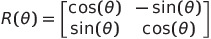

For a rotation of 45 degrees  the matrix is:

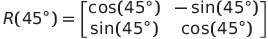

**2. Define the Vectors to Transform:** Let's use the transformed vectors from the scaling exercise as our starting point. Assume those vectors were:

    Vector A: [2, 6]
    Vector B: [8, 15]
    
**3. Apply the Rotation Transformation:** Multiply each vector by the rotation matrix to apply the 45-degree rotation.

In [ ]:
import numpy as np

theta = np.pi / 4  # 45 degrees in radians
R = np.array([[np.cos(theta), -np.sin(theta)], 
              [np.sin(theta), np.cos(theta)]])

vector_a = np.array([2, 6])
vector_b = np.array([8, 15])

rotated_vector_a = np.dot(R, vector_a)
rotated_vector_b = np.dot(R, vector_b)

print("Rotated Vector A:", rotated_vector_a)
print("Rotated Vector B:", rotated_vector_b)

### Interpret the Results

The rotated vectors, `rotated_vector_a` and `rotated_vector_b`, represent the original vectors after being rotated by 45 degrees counterclockwise around the origin. This rotation changes their direction but maintains their magnitude (length). The exact values of the rotated vectors depend on the original vectors and the rotation angle.

- `Vector A`'s new position shows how it has been pivoted from its original orientation in space, yet its distance from the origin remains the same.
- `Vector B` undergoes a similar transformation, showcasing the rotation's effect on its orientation while preserving its length.

------------

# 5. Matrix Inversion

Matrix inversion is a critical operation in linear algebra that involves finding a matrix, called the inverse, that, when multiplied with the original matrix, yields the identity matrix.
- The identity matrix is a special type of diagonal matrix where all the elements on the main diagonal are `1s`, and all other elements are `0s`.
- Matrix inversion is widely used in solving systems of linear equations, in algorithms for digital signal processing, and in computer graphics for transformations.

Implementation:

**1. Create a Square Matrix:** Creating a 3x3 square matrix, which could represent a system of linear equations or a transformation in 3D space.

**2. Calculate the Inverse of the Matrix:** We calculate the inverse of matrix  using NumPy's `np.linalg.inv()` function.

**3. Multiply the Matrix by Its Inverse:** To verify that  is indeed the inverse of , we multiply  by  and check if the result is the identity matrix.

In [ ]:
import numpy as np

# Define a 3x3 square matrix
A = np.array([[4, 7, 2],
              [-3, 6, 3],
              [8, 1, -1]])

# Calculate the inverse of A
A_inv = np.linalg.inv(A)

# Multiply A by its inverse
identity_matrix = np.dot(A, A_inv)


# Manually print each element in the desired format
print("Result of A multiplied by its Inverse:")
for row in identity_matrix:
    formatted_row = ["{:.1f}".format(elem) for elem in row]
    print("[", " ".join(formatted_row), "]")

### Interpret the Results

After multiplying  by , the resulting matrix should be very close to the identity matrix, with slight deviations possible due to floating-point arithmetic inaccuracies.

----------------

# 6. Determinant and Volume Scaling


The determinant not only quantifies the scaling effect on area or volume but also gives insights into changes in orientation.

Implementation:

**1. Define the Transformation Matrix:** Suppose the transformation matrix T is

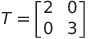

This matrix scales the x-dimension by a factor of 2 and the y-dimension by a factor of 3.

**2: Calculate the Determinant:** The determinant of a 2x2 matrix 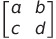 is computed as `ad−bc`. For matrix T, the determinant is:



In [ ]:
import numpy as np

T = np.array([[2, 0],
              [0, 3]])
det_T = np.linalg.det(T)
print(f"Determinant of T: {det_T:.2f}")

### Interpret the Results

The determinant of matrix T is 6, which tells us about the scaling effect of the transformation on the area (in 2D) or volume (in higher dimensions) of geometric shapes. Specifically:

- **Volume Scaling Factor:** The absolute value of the determinant (6 in this case) indicates how much the area or volume of a shape is scaled when the transformation is applied. For this matrix, any area in the 2D plane is scaled by a factor of 6. If you apply this transformation to a unit square (area = 1), the resulting shape would have an area of 6, reflecting the combined scaling effects in both dimensions.

- **Orientation Change:** Since the determinant is positive, the transformation preserves the orientation of shapes. A negative determinant would indicate a reflection, causing a change in orientation.

-------------

# 7. Trace and Invariance


The trace of a square matrix is the sum of its diagonal elements. It's an important property because it remains invariant under a change of basis, meaning that the trace of a matrix is the same no matter what basis we use to represent the matrix.

**Calculate the Trace of a Transformation Matrix**


We have matrix T as below:

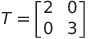

And a 3x3 rotation matrix R might look something like this:

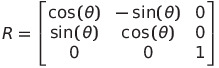

where θ is the angle of rotation. Let's assume  (or π/4 radians).

In [ ]:
import numpy as np

T = np.array([[2, 0], [0, 3]])
R = np.array([[np.cos(np.pi/4), -np.sin(np.pi/4), 0], 
              [np.sin(np.pi/4), np.cos(np.pi/4), 0], 
              [0, 0, 1]])

trace_T = np.trace(T)
trace_R = np.trace(R)

print(f"Trace of T: {trace_T}")
print(f"Trace of R: {trace_R:.2f}")

### Interpret the Results

- **Trace of \(T\)**: The trace of the scaling matrix \(T\) is \(2 + 3 = 5\). This represents the sum of the scaling factors applied to the x and y dimensions, which is a simple sum in this case because it's a diagonal matrix.
- **Trace of \(R\)**: The trace of the rotation matrix \(R\), assuming , involves the sum of the cosines along the diagonal, plus 1 for the z-component (unchanged in this rotation). Given that , the trace is approximately .

-------------

# 8. Diagonal Matrices and Scaling

The diagonal scaling matrix has effectively scaled the original vectors, altering their magnitude according to the scaling factors specified in the matrix. This transformation demonstrates how diagonal matrices can apply uniform scaling to vectors, affecting each component by a different factor without changing the vectors' directions.

In practical applications, such scaling is crucial in data preprocessing for machine learning, where feature vectors might need to be normalized or adjusted in magnitude, and in computer graphics, where objects in a scene are scaled to achieve the desired visual proportions.

Implementation:

**1. Define Original Vectors**

**2. Create a Diagonal Scaling Matrix:** A diagonal matrix for scaling will have scaling factors as its diagonal elements.

**3. Apply the Scaling Transformation:** Multiply the original vectors by the scaling matrix to apply the transformation.

**4. Show Before and After, and Explain the Effect**

In [ ]:
import numpy as np

vector_a = np.array([1, 2])
vector_b = np.array([3, 4])

scaling_matrix = np.array([[2, 0],
                           [0, 3]])

scaled_vector_a = np.dot(scaling_matrix, vector_a)
scaled_vector_b = np.dot(scaling_matrix, vector_b)

print("Original Vector A:", vector_a)
print("Scaled Vector A:", scaled_vector_a)
print("\nOriginal Vector B:", vector_b)
print("Scaled Vector B:", scaled_vector_b)

### Interpretation of the Results

- Before Scaling:
    - Vector A is [1, 2].
    - Vector B is [3, 4].
- After Scaling:
    - Vector A becomes [2, 6], where the first component has been doubled and the second tripled, as per the scaling matrix.
    - Vector B transforms into [6, 12], showing the same scaling effect.

------------

# 9. Norms of Vectors

The L1 and L2 norms offer different perspectives on a vector's magnitude.
- The L1 norm is useful for emphasizing sparsity and is less sensitive to outliers than the L2 norm.
- In contrast, the L2 norm is more sensitive to changes in high values due to the squaring of components, providing the geometric length of the vector.

Understanding these differences is crucial for applications like feature selection, where the choice of norm can significantly impact model performance and interpretation.

Implementation:

**1. Define the Vector**

**2. Calculate the L1 Norm:** The L1 norm (also known as the Manhattan norm) is the sum of the absolute values of the vector components.

**3. Calculate the L2 Norm:** The L2 norm (also known as the Euclidean norm) is the square root of the sum of the squares of the vector components. It represents the "straight-line" distance from the origin to the point in space defined by the vector.

In [ ]:
import numpy as np

v = np.array([3, -4, 5])

l1_norm = np.sum(np.abs(v))

l2_norm = np.sqrt(np.sum(np.square(v)))

print("Vector v:", v)
print("L1 Norm of v:", l1_norm)
print("L2 Norm of v:", l2_norm)

### Interpretation of the Results

- L1 Norm: The L1 norm sums the absolute values, treating all dimensions equally but independently. It is 12 for the vector v, indicating the total "city block" distance it spans across all dimensions.
- L2 Norm: The L2 norm, 7.07 for vector v, represents the direct distance from the origin to the point in space defined by v. It's influenced more by larger values due to the squaring operation.

------------

1\. Vectors
===========

*   **Explanation**: Describe vectors as a way to represent data in multi-dimensional space, where each dimension can correspond to a different feature or characteristic of the data. For example, in computer vision, a vector could represent the pixel values of an image.
    
*   **Application**: Explain how vectors are crucial in algorithms for image recognition, where the direction and magnitude can help in understanding patterns or in machine learning models for classifying images.
    

**Example: Facial Recognition**

*   In facial recognition technology, images of faces are often represented as high-dimensional vectors. Each image can be thought of as a point in a multi-dimensional space, where each dimension corresponds to the pixel intensity in different parts of the image. Here's how vectors play a crucial role:
    

1.  **Image Representation**: Consider an image of a face that is converted into grayscale for simplicity. Each pixel in this image can be represented by a value between 0 and 255, indicating how light or dark that pixel is. For a 100x100 pixel image, this results in a 10,000-dimensional vector where each element of the vector represents the intensity of one pixel.
    
2.  **Feature Extraction**: Instead of using raw pixel values, which are highly dimensional and sensitive to variations in light, pose, or expression, more sophisticated methods extract features that represent unique aspects of the face. Techniques like Principal Component Analysis (PCA) or Convolutional Neural Networks (CNNs) can be used to reduce dimensionality and extract meaningful features, such as edges, contours, and specific landmarks (eyes, nose, mouth position). These features can be represented as vectors in a lower-dimensional space.
    
3.  **Comparison and Classification**: When recognizing or verifying faces, the similarity between feature vectors is measured. This is often done using the inner product or cosine similarity to compare the angle between two vectors, indicating how similar two faces are. For instance, in a simple facial recognition algorithm, the system may have a database of known faces, each represented by a feature vector. When a new image is presented to the system, it is converted into a feature vector using the same method. The system then compares this vector to the vectors in its database using the dot product to find the most similar face.
    
4.  **Real-World Application**: This approach is widely used in various applications, from unlocking smartphones with facial recognition to security systems that allow access based on facial identity. In these cases, understanding and manipulating vectors is fundamental to the process of recognizing and differentiating faces.
    

By representing images as vectors and applying linear algebra operations, computer vision systems can efficiently process, analyze, and classify images in ways that mimic human visual recognition but on a much larger and faster scale. This example illustrates the power of vectors in transforming raw data into actionable insights, a principle that lies at the heart of computer vision technology.

**Example: how vectors and related concepts are applied in image classification, specifically in recognizing handwritten digits**

*   Let's take a detailed step-by-step look at a real-world example of how vectors and related concepts are applied in image classification, specifically in recognizing handwritten digits using a machine learning model like a Convolutional Neural Network (CNN). This process involves several steps where vectors, matrices, and other linear algebra concepts play essential roles.
    

**Step 1: Image Representation as Vectors**

*   **Concept**: Vectors and Matrices
    
*   **Explanation**: Each image of a handwritten digit (e.g., from the MNIST dataset, a popular benchmark in machine learning) is represented as a 2D matrix of pixel values. For simplicity, assume each image is 28x28 pixels, and each pixel's intensity is represented by a value (0-255 for grayscale images). This matrix can also be flattened into a 784-dimensional vector (28x28), where each element of the vector represents the intensity of one pixel.
    

**Step 2: Applying Filters and Feature Detection**

*   **Concept**: Matrix Multiplication and Convolution
    
*   **Explanation**: In the preprocessing or initial layers of a CNN, filters (small matrices) are applied to the input image to detect features such as edges, corners, or textures. This is achieved through convolution operations, which involve matrix multiplication between the filter and local regions of the image matrix. The result is a feature map that highlights specific patterns in the image.
    

**Step 3: Non-linear Activation**

*   **Concept**: Function Application
    
*   **Explanation**: After convolution, a non-linear activation function, such as ReLU (Rectified Linear Unit), is applied element-wise to the feature map. This step introduces non-linearity, allowing the network to learn complex patterns. It's akin to applying a function to each element of the resulting vector from the convolution operation, enhancing the network's representational power.
    

**Step 4: Pooling to Reduce Dimensionality**

*   **Concept**: Norm and Dimension Reduction
    
*   **Explanation**: Pooling layers reduce the dimensionality of the feature maps to decrease computational complexity and overfitting. Max pooling, for example, involves taking the maximum value in a local region of the feature map. This can be seen as selecting the strongest feature (or highest vector norm within a subset) in each region, effectively compressing the data while preserving essential information.
    

**Step 5: Flattening and Fully Connected Layers**

*   **Concept**: Vectors and Matrix Multiplication
    
*   **Explanation**: After several convolution and pooling layers, the feature maps are flattened into a vector and fed into fully connected layers (traditional neural network layers). Here, each neuron's output is a weighted sum (matrix-vector multiplication) of inputs, followed by an activation function. This stage combines all learned features to make predictions.
    

**Step 6: Output and Classification**

*   **Concept**: Dot Product and Softmax
    
*   **Explanation**: The final layer of a CNN often uses the softmax function to classify the input image into one of several categories (e.g., digits 0-9). The softmax function takes the vector of raw class scores (output from the last fully connected layer) and turns it into probabilities by comparing the exponential of each score (making the scores non-negative and allowing them to sum to one).
    

**Real-World Application: Digit Recognition**

Imagine using this CNN to sort handwritten digits on envelopes for automatic mail sorting. The process involves capturing an image of the digit, preprocessing it, extracting and classifying features through the CNN, and finally determining the digit's identity with high accuracy. This automated process significantly speeds up mail sorting, reduces errors, and showcases the power of applying linear algebra concepts in practical computer vision tasks.

To implement a Convolutional Neural Network (CNN) for recognizing handwritten digits, like those in the MNIST dataset, you can use a popular deep learning library such as TensorFlow with Keras. Here's a step-by-step guide to building and training a simple CNN model for this task.

**Step 1: Setup Your Environment**

First, ensure you have Python installed on your system. Then, install TensorFlow, which includes Keras, by running:

`pip install tensorflow`

**Step 2: Load the MNIST Dataset**

TensorFlow makes it easy to load the MNIST dataset with a built-in function:



**Step 3: Preprocess the Data**

Preprocess the images by normalizing the pixel values and reshaping the data to fit the model input:

**Step 4: Build the CNN Model**

Create your CNN model using Keras:

**Step 5: Compile the Model**

Compile the model with an optimizer and loss function:

**Step 6: Train the Model**

Train the model using the training data:

**Step 7: Evaluate the Model**

Finally, evaluate the model's performance on the test dataset:

This example builds a simple CNN with two convolutional layers followed by max-pooling layers, a flattening step, and two dense layers. The final layer uses a softmax activation function to output a probability distribution over the 10 digit classes. By adjusting the number of layers, layer sizes, and epochs, you can experiment to improve accuracy.

Remember, deep learning and machine learning are iterative processes where experimentation and refinement are key to achieving high performance.

In [ ]:
!conda install tensorflow -y


# Import necessary libraries
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape and normalize the image data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define the CNN model architecture
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Adding a fully connected layer
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

---------------------

2\. Inner Product (Dot Product)
===============================

*   **Explanation**: Explain the inner product as a mathematical operation that measures the similarity between two vectors. It projects one vector onto another to see how much one vector is in the direction of another.
    
*   **Application**: Discuss its use in calculating the cosine similarity between vectors, which is essential in machine learning for tasks such as identifying similar images or documents.
    

**Real-World Example: Movie Recommendation System**

Imagine a movie recommendation system that suggests movies to users based on their rating history. Each user's ratings for a set of movies can be represented as a vector, where each element of the vector corresponds to a rating for a specific movie. For simplicity, let's consider a scenario with only three movies.

*   **User A's ratings**: \[4, 5, 3\] for Movies 1, 2, and 3 respectively.
    
*   **User B's ratings**: \[5, 4, 1\] for Movies 1, 2, and 3 respectively.
    

These vectors represent each user's taste in movies. To recommend new movies to User A, the system can look for other users with similar tastes and suggest movies that those users rated highly but User A hasn't watched yet.

**Calculating Similarity with Inner Product**

The inner product of User A's and User B's rating vectors can be calculated as follows:

{Similarity} = (4 \* 5) + (5 \* 4) + (3 \* 1) = 20 + 20 + 3 = 43

The inner product gives us a single number that represents how aligned User A's movie ratings are with User B's ratings. The higher the number, the more similar their tastes are. This number is essentially a sum of products, where each product is the rating from User A for a movie multiplied by the rating from User B for the same movie.

**Interpretation**

*   **High Inner Product**: A high value indicates that both users tend to rate movies similarly, suggesting they have similar tastes. In our example, the result of 43 suggests a certain level of similarity between User A and User B, implying that they might enjoy similar movies.
    
*   **Direction and Magnitude**: While the inner product gives a measure of similarity, it's also influenced by the magnitude of the ratings. Users who rate movies more generously (higher numbers) could have a higher inner product with others due to the nature of the calculation.
    

**Application in Recommendation Systems**

By calculating the inner product between User A's ratings vector and the ratings vectors of all other users in the database, the system can identify users with the most similar tastes. It then suggests movies that these similar users have rated highly but User A hasn't seen, leveraging the similarity measure as a basis for recommendations.

This example illustrates how the inner product serves as a simple yet powerful tool to measure the similarity between vectors, enabling systems to make connections and recommendations based on patterns in multidimensional data.

**Example: Document similarity, a common task in natural language processing (NLP)**

Let's delve into a step-by-step real-world example of using inner product to calculate cosine similarity between vectors, focusing on document similarity, a common task in natural language processing (NLP) and information retrieval. This example will demonstrate how the inner product measures the similarity between documents, which can be used for tasks such as search engine ranking, plagiarism detection, or document clustering.

**Step 1: Represent Documents as Vectors**

**Objective**: Convert two text documents into vectors based on word occurrence.

**Example Documents**:

*   **Document 1**: "Machine learning is fascinating."
    
*   **Document 2**: "Learning machine concepts is enjoyable."
    

**Process**:

1.  Create a word set from all documents. Assume our word set (vocabulary) is {"machine", "learning", "is", "fascinating", "concepts", "enjoyable"}.
    
2.  Convert each document into a vector where each element counts the occurrence of a word from the word set in the document.
    

**Vector Representations**:

*   **Vector 1** (for Document 1): \[1, 1, 1, 1, 0, 0\] corresponding to each word in the set.
    
*   **Vector 2** (for Document 2): \[1, 1, 1, 0, 1, 1\]
    

**Step 2: Calculate the Inner Product**

**Objective**: Measure the similarity between the two vectors using the inner product.

**Calculation**:

*   For **Vector 1** and **Vector 2**, the inner product is calculated as:
    

**Step 3: Calculate the Norms of the Vectors**

**Objective**: To use the inner product for calculating cosine similarity, we also need the norms of the vectors.

**Calculation**:

*   **Norm of Vector 1**:
    

*   **Norm of Vector 2**:
    

**Step 4: Calculate Cosine Similarity**

**Objective**: Use the inner product and norms to calculate the cosine similarity, which measures the cosine of the angle between the two vectors. This value ranges from -1 (completely different) to 1 (exactly the same).

**Calculation**:

*   Cosine **similarity** is given by the formula:
    

*   **Plugging** in our values:
    

**Step 5: Interpretation**

**Outcome**: A cosine similarity score of 0.75 suggests a high degree of similarity between the two documents. Despite having different words, the presence of shared keywords such as "machine", "learning", and "is" contributes to their similarity.

**Real-World Application**: In a search engine or document retrieval system, this method can be used to rank documents by how similar they are to a query document. Documents with higher cosine similarity scores to the query are ranked higher and are more likely to be relevant to the user's search.

This example illustrates how the inner product, in conjunction with vector norms, can quantify the similarity between text documents in a meaningful way, enabling applications that require semantic understanding of document content.

To implement the cosine similarity calculation between two documents as described, we'll write a Python script that follows the outlined steps. This script will:

1.  Tokenize the documents into words.
    
2.  Create a combined word set for both documents.
    
3.  Convert each document into a vector based on word occurrences.
    
4.  Calculate the inner product (dot product) between the two vectors.
    
5.  Compute the norms of the vectors.
    
6.  Calculate the cosine similarity based on the inner product and norms.
    

**Python Implementation**

from collections import Counter

import math# Step 1: Define the documentsdoc1 = "Machine learning is fascinating."doc2 = "Learning machine concepts is enjoyable."# Step 2: Tokenize and create a combined word set# Lowercasing for consistency and splitting by spaces for simplicitywords\_doc1 = doc1.lower().split()words\_doc2 = doc2.lower().split()combined\_words = list(set(words\_doc1 + words\_doc2))# Step 3: Create vectors based on word occurrencesvector1 = \[words\_doc1.count(word) for word in combined\_words\]vector2 = \[words\_doc2.count(word) for word in combined\_words\]# Step 4: Calculate the inner product (dot product)inner\_product = sum(v1 \* v2 for v1, v2 in zip(vector1, vector2))# Step 5: Calculate the norms of the vectorsnorm1 = math.sqrt(sum(v \*\* 2 for v in vector1))norm2 = math.sqrt(sum(v \*\* 2 for v in vector2))# Step 6: Calculate cosine similaritycosine\_similarity = inner\_product / (norm1 \* norm2)print("Cosine Similarity:", cosine\_similarity)

**Explanation**

*   **Tokenization**: We split each document into words (a simple approach using split) and lowercase them to ensure consistency.
    
*   **Combined Word Set**: We create a set of unique words present in either document.
    
*   **Vector Creation**: For each document, we create a vector where each element is the count of occurrences of a word from the combined word set.
    
*   **Inner Product**: We calculate the sum of the products of corresponding elements in the two vectors.
    
*   **Norms Calculation**: The norm of a vector is calculated as the square root of the sum of the square of its elements.
    
*   **Cosine Similarity**: Finally, we calculate the cosine similarity by dividing the inner product by the product of the two vectors' norms.
    

This script is a basic implementation of document similarity using cosine similarity. In real-world applications, especially with larger texts and more complex needs, more sophisticated methods and optimizations might be used, such as TF-IDF (Term Frequency-Inverse Document Frequency) weighting, and leveraging libraries like NLTK or spaCy for tokenization, and scikit-learn for vectorization and cosine similarity calculations.